<br>

# Deep Learning for Interpreting Handwritten Digits

<br>

This is a demonstration of the ability of sequential Keras models to correctly apply Tensorflow to read handwritten digits that have been rendered into an array of scalers denoting grayscale values.  The data for this project was furnished by [Kaggle](https://www.kaggle.com/c/digit-recognizer/data).

<br>

The importation of Keras libraries requires the following commands at the Anaconda command prompt:<br>
<i>pip install keras</i><br>
<i>pip install tensorflow</i><br>
Repeat if necessary to get all of the associated packages loaded.

In [300]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

Reading in the data set and checking the data frame holding it:

In [301]:
train_df = pd.read_csv('train.csv')

In [302]:
train_df.head().style.hide_index()

In [303]:
train_df.shape, train_df.columns[0]

((42000, 785), 'label')

This is a sample of what the digits look like:

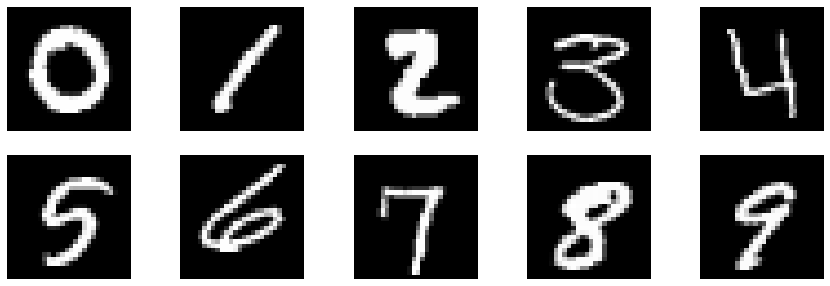

In [304]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(5)
for i in range (10):
    plt.subplot(2,5,i+1).set_axis_off()
    for j in range (train_df.shape[0]):
        if train_df.iloc[j]['label'] == i:
            plt.imshow(np.array(train_df.drop('label', axis=1).iloc[j]).reshape((28,28)), interpolation='none', cmap='gray')
            break

Using the first 40,000 handwritten digits to build and test a neural network for reading them:

In [305]:
data_set = train_df.iloc[:40000]
data_set.shape

(40000, 785)

In [306]:
model = Sequential()
X = data_set.drop('label', axis=1)
y = data_set[['label']]

One hot coding the label, consisting of a single digit:

In [307]:
dummies = pd.get_dummies(y['label'])
y[dummies.columns] = dummies
y.drop('label', axis=1, inplace=True)

In [308]:
y.tail()

,0,1,2,3,4,5,6,7,8,9
39995,1,0,0,0,0,0,0,0,0,0
39996,0,0,0,1,0,0,0,0,0,0
39997,1,0,0,0,0,0,0,0,0,0
39998,1,0,0,0,0,0,0,0,0,0
39999,0,0,0,1,0,0,0,0,0,0


Now to build the model.  Stability of the final result was reached by creating a model with four dense layers, each with one hundred neurons.

In [309]:
model.add(Dense(100, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

100 epochs was found to be enough.  An early stopping monitor for the training of the model was tried but found not to be useful.  (The option of lowering the 'patience' to a meaningful value was left in the code.)

In [310]:
early_stopping_monitor = EarlyStopping(patience=200)
model.fit(X, y, epochs=100, validation_split=0.3, callbacks=[early_stopping_monitor], verbose=True)
model.fit(X, y, validation_split=0.3)

Epoch 1/100
875/875 [==============================] - 1s 1ms/step - loss: 1.0361 - accuracy: 0.8270 - val_loss: 0.3545 - val_accuracy: 0.9020
Epoch 2/100
875/875 [==============================] - 1s 1ms/step - loss: 0.2887 - accuracy: 0.9205 - val_loss: 0.2970 - val_accuracy: 0.9158
Epoch 3/100
875/875 [==============================] - 1s 2ms/step - loss: 0.2109 - accuracy: 0.9407 - val_loss: 0.2503 - val_accuracy: 0.9324
Epoch 4/100
875/875 [==============================] - 1s 1ms/step - loss: 0.1731 - accuracy: 0.9504 - val_loss: 0.2433 - val_accuracy: 0.9390
Epoch 5/100
875/875 [==============================] - 1s 1ms/step - loss: 0.1462 - accuracy: 0.9572 - val_loss: 0.1851 - val_accuracy: 0.9507
Epoch 6/100
875/875 [==============================] - 1s 1ms/step - loss: 0.1377 - accuracy: 0.9606 - val_loss: 0.1867 - val_accuracy: 0.9498
Epoch 7/100
875/875 [==============================] - 1s 2ms/step - loss: 0.1320 - accuracy: 0.9620 - val_loss: 0.1704 - val_accuracy: 0.9514

Epoch 58/100
875/875 [==============================] - 1s 1ms/step - loss: 0.0300 - accuracy: 0.9942 - val_loss: 0.3551 - val_accuracy: 0.9693
Epoch 59/100
875/875 [==============================] - 1s 1ms/step - loss: 0.0321 - accuracy: 0.9936 - val_loss: 0.3155 - val_accuracy: 0.9660
Epoch 60/100
875/875 [==============================] - 1s 1ms/step - loss: 0.0206 - accuracy: 0.9955 - val_loss: 0.4084 - val_accuracy: 0.9650
Epoch 61/100
875/875 [==============================] - 1s 1ms/step - loss: 0.0193 - accuracy: 0.9956 - val_loss: 0.4699 - val_accuracy: 0.9641
Epoch 62/100
875/875 [==============================] - 1s 1ms/step - loss: 0.0325 - accuracy: 0.9939 - val_loss: 0.3627 - val_accuracy: 0.9648
Epoch 63/100
875/875 [==============================] - 1s 1ms/step - loss: 0.0258 - accuracy: 0.9950 - val_loss: 0.3697 - val_accuracy: 0.9653
Epoch 64/100
875/875 [==============================] - 1s 1ms/step - loss: 0.0168 - accuracy: 0.9962 - val_loss: 0.4762 - val_accuracy:

The accuracy on the bottom line is the real measure of how well the model works on 28000 new pixilated digits after being trained on a sample of 12000.  After executing this notebook repeatedly, it was found to be consistently higher than 99%.  This stability is also shown by the consecutive incidence of epochs that are 99% or better against the test set at the conclusion of this process.  With each trial, the data set was reshuffled to create a new pair of training and test splits.
<br>
<br>
Arguably, the best test of the model is to see which digits it gets wrong.  A sign of success would be digits that were not neatly written and clear to any reader who is used to unfamiliar handwriting.  Start by packing all of the digits as predicted into a dataframe:

In [311]:
ypred= pd.DataFrame(model.predict(X)).applymap(lambda x: round(x))
ypred.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


As a sanity check, compare with y.head():

In [312]:
y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


Look for errors and plot them:

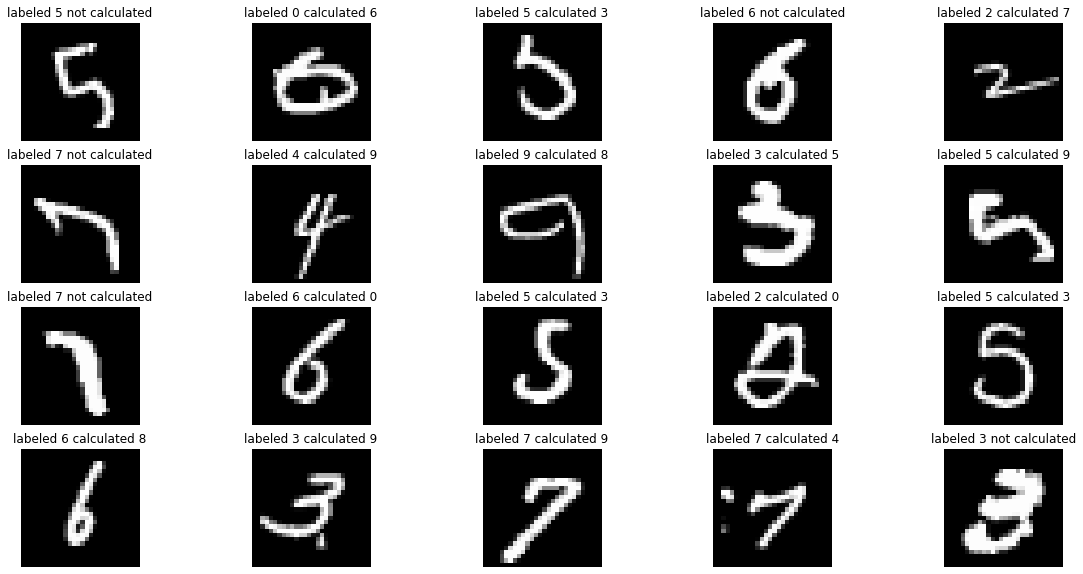

In [316]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)
for i in range (20):
    plt.subplot(4,5,i+1).set_axis_off()
    while (np.sum(y.iloc[row_number].values == ypred.iloc[row_number].values) == 10):
        row_number+=1
    plt.title('labeled ' + str(list(y.iloc[row_number]).index(1)) + (' calculated ' + \
              str(list(ypred.iloc[row_number]).index(1)) if 1 in list(ypred.iloc[row_number]) else ' not calculated'))
    plt.imshow(np.array(X.iloc[row_number]).reshape((28,28)), interpolation='none', cmap='gray')
    row_number+=1

A majority of these show some handwriting difficulty but the human eye is still better at recognizing digits.